For this project you will visualize time series data using a line chart, bar chart, and box plots. You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.

Use the data to complete the following tasks:
- Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.

- Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

- Create a ``draw_line_plot`` function that uses Matplotlib to draw a line chart similar to __examples/Figure_1.png__. The title should be ``Daily freeCodeCamp Forum Page Views 5/2016-12/2019``. The label on the x axis should be ``Date`` and the label on the y axis should be ``Page Views``.

- Create a ``draw_bar_plot`` function that draws a bar chart similar to __examples/Figure_2.png__. It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of ``Months``. On the chart, the label on the x axis should be ``Years`` and the label on the y axis should be ``Average Page Views``.

- Create a ``draw_box_plot`` function that uses Seaborn to draw two adjacent box plots similar to __examples/Figure_3.png__. These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be ``Year-wise Box Plot (Trend)`` and the title of the second chart should be ``Month-wise Box Plot (Seasonality)``. Make sure the month labels on bottom start at ``Jan`` and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

Text(0, 0.5, 'Page Views')

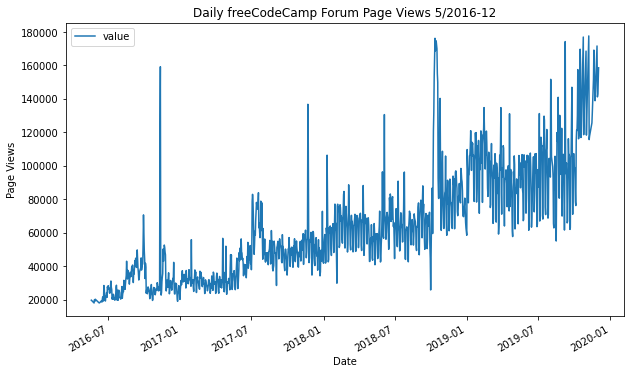

In [2]:
_numtomonth = {1 : "January", 2 : "February", 3 : "March", 4 : "April", 
              5 : "May" , 6 : "June", 7 : "July", 8 : "August", 
              9 : "September", 10 : "October" ,11 : "November",12 : "December"}

_mlist = [x[:3] for x in _numtomonth.values()]


# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv', index_col='date')
df.index = pd.to_datetime(df.index)

# Clean data
df = df.loc[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(1-0.025))]


def draw_line_plot():
    # Draw line plot
    fig = df.plot(figsize=(8,6)).get_figure()  
    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    plt.xlabel('Date')
    plt.ylabel('Page Views')

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.groupby([df.index.year.rename('Years'), df.index.month.rename('Months')]).mean().unstack()['value'].rename(columns=_numtomonth)

    # Draw bar plot

    fig = df_bar.plot(figsize=(10,10),kind='bar').get_figure()
    plt.ylabel('Average Page Views')

    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig

def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['Year'] = [d.year for d in df_box.date]
    df_box['Month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    fig, axes = plt.subplots(1, 2,figsize=(20,10))
    sns.boxplot(  y="value", x= "Year", data=df_box,  orient='v' , ax=axes[0])
    sns.boxplot(  y="value", x= "Month", data=df_box,  orient='v' , ax=axes[1],order=_mlist)
    axes[0].set_ylabel('Page Views')
    axes[1].set_ylabel('Page Views')
    axes[0].set_title('')
    axes[1].set_title('')

    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig